In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("D:/MIT/Semester-6/Machine Learning Lab/Datasets/MalwareMemoryDump.csv")

In [4]:
df.head()

,Raw_Type,pslist_nproc,pslist_nppid,pslist_avg_threads,pslist_nprocs64bit,pslist_avg_handlers,dlllist_ndlls,dlllist_avg_dlls_per_proc,handles_nhandles,handles_avg_handles_per_proc,...,svcscan_fs_drivers,svcscan_process_services,svcscan_shared_process_services,svcscan_interactive_process_services,svcscan_nactive,callbacks_ncallbacks,callbacks_nanonymous,SubType,callbacks_ngeneric,Label
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,26,24,116,0,121,87,0,Benign,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,26,24,118,0,122,87,0,Benign,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,26,27,118,0,120,88,0,Benign,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,26,27,118,0,120,88,0,Benign,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,26,24,118,0,124,87,0,Benign,8,Benign


In [5]:
df['Raw_Type'].unique().sum()

'BenignRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-1.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-10.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-2.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-3.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-4.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-5.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-6.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-7.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-8.rawRansomware-Ako-00a2c6bab1e53f679cdd4fdc772cd291928c109b9b747652639a1700d844f719-9.rawRansomware-Ako-0a065c408e05e2c2febfbca4c15db34821033e8724d15eed9898d68c3ffb8443-1.rawRansomware-Ako-0a065c408e05e2c2febfbca4c15db34821033e8724

In [6]:
df = df.drop(['Raw_Type'], axis=1)

In [7]:
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns

In [8]:
cat_cols

Index(['SubType', 'Label'], dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

for i in cat_cols:
    df[i] = lbl_enc.fit_transform(df[i])

In [10]:
X = df.drop(['Label'], axis=1)

y = df['Label']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_original = SVC(kernel='linear')
svm_original.fit(X_train,y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy Original: ",accuracy_original)

Accuracy Original:  1.0


In [13]:
from sklearn.decomposition import PCA
for i in range(1,6):
    print("Components: ", i)
    pca = PCA(n_components=i)

    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, 
    random_state=42)

    svm_pca = SVC(kernel='linear')
    svm_pca.fit(X_train_pca, y_train)
    y_pred_pca = svm_pca.predict(X_test_pca)

    accuracy_pca = accuracy_score(y_test,y_pred_pca)
    print("Accuracy PCA: ", i, "-->", accuracy_pca)


Components:  1
Accuracy PCA:  1 --> 0.9652730375426621
Components:  2
Accuracy PCA:  2 --> 0.9841296928327645
Components:  3
Accuracy PCA:  3 --> 0.996160409556314
Components:  4
Accuracy PCA:  4 --> 0.9963310580204778
Components:  5
Accuracy PCA:  5 --> 0.997098976109215


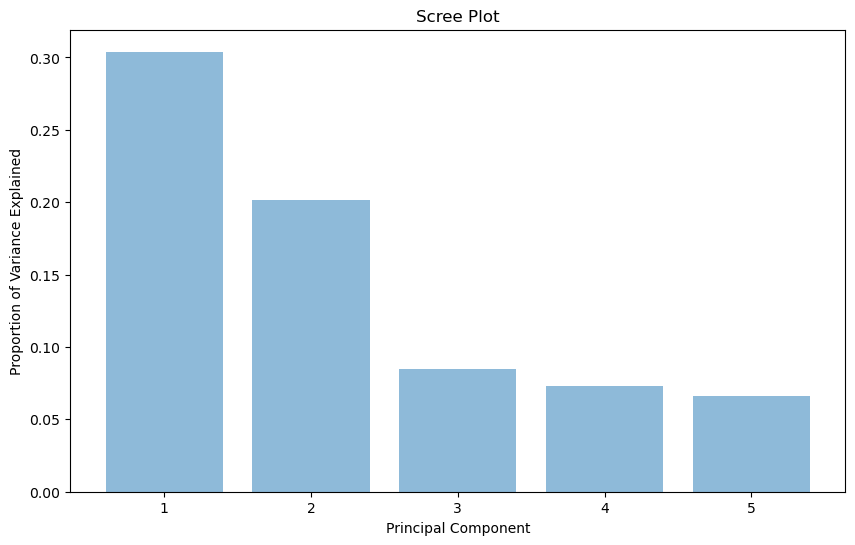

In [14]:
import matplotlib.pyplot as plt

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance_ratio) +1), explained_variance_ratio,
        alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()